In [199]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson, geom

In [131]:
clean_data = pd.read_csv("clean (1).csv")
hours, age = clean_data["hours-per-week"], clean_data["age"]

# Box plot, violint plot, hystogram, density plot, contour plot

## Box plots

<Axes: ylabel='hours-per-week'>

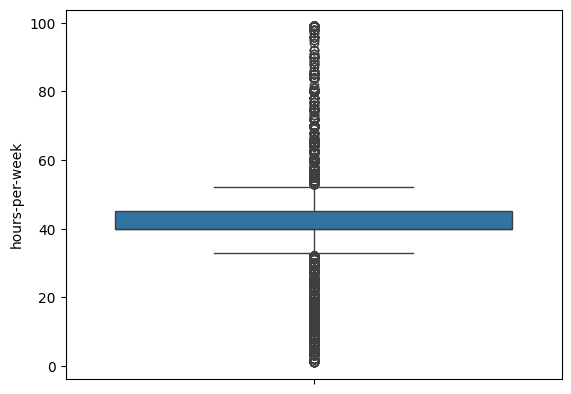

In [127]:
sns.boxplot(hours)

## Violin plots

<Axes: ylabel='hours-per-week'>

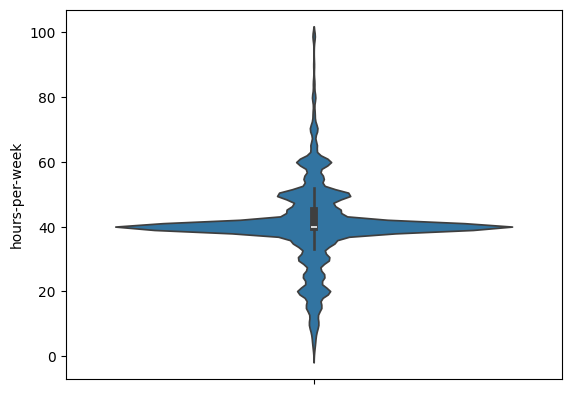

In [128]:
sns.violinplot(hours)

## Histograms

<Axes: xlabel='hours-per-week', ylabel='Count'>

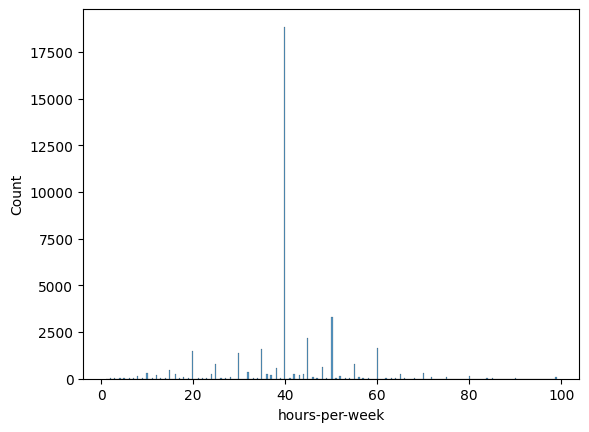

In [129]:
sns.histplot(hours)

## Density plots

<Axes: xlabel='hours-per-week', ylabel='Density'>

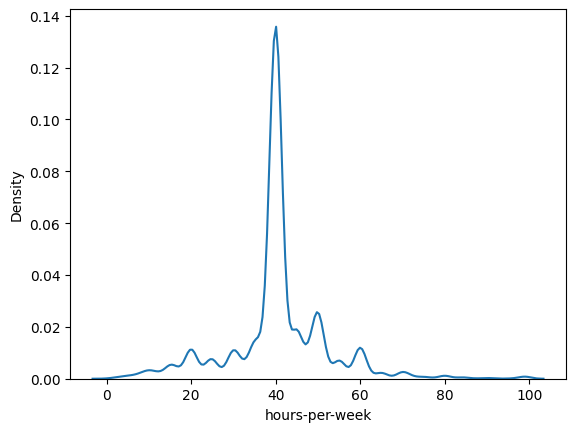

In [130]:
sns.kdeplot(hours)

## Contour plot

<Axes: xlabel='hours-per-week', ylabel='age'>

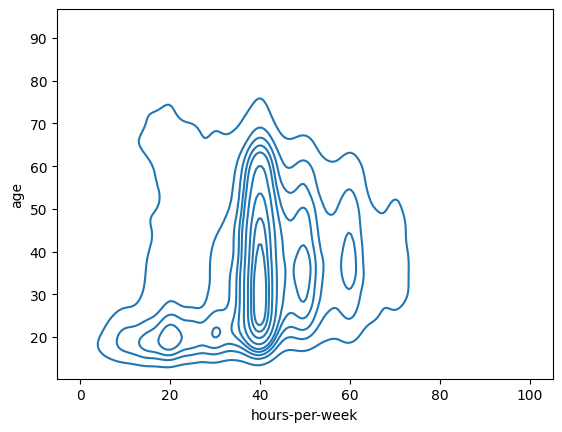

In [132]:
sns.kdeplot(x=hours, y=age)

# Correlation coeficients, correlation matrix, mode and standart deviation

In [134]:
np.corrcoef(hours, age)

array([[1.        , 0.10578123],
       [0.10578123, 1.        ]])

In [135]:
datasets = [hours, age]

In [136]:
def get_var_name(var):
    # Iterate over global variables
    for name, value in globals().items():
        # Check if the variable is a NumPy array and if their values are equal
        if isinstance(value, pd.Series) and var.equals(value):
            return name
    return None


In [141]:
for df in datasets:
    name = get_var_name(df)
    print(75*'-')
    print(f'mode of {name}: {sc.stats.mode(df)}')
    print(f'standart deviation of {name}: {np.std(df)}')

<class 'pandas.core.series.Series'>
---------------------------------------------------------------------------
mode of df: ModeResult(mode=40.0, count=18847)
standart deviation of df: 11.967996912577274
<class 'pandas.core.series.Series'>
---------------------------------------------------------------------------
mode of df: ModeResult(mode=23.0, count=1179)
standart deviation of df: 13.156927624072178


In [145]:
df_mean, df_stddev = np.mean(datasets[0]), np.std(datasets[0])

<Axes: xlabel='hours-per-week', ylabel='Density'>

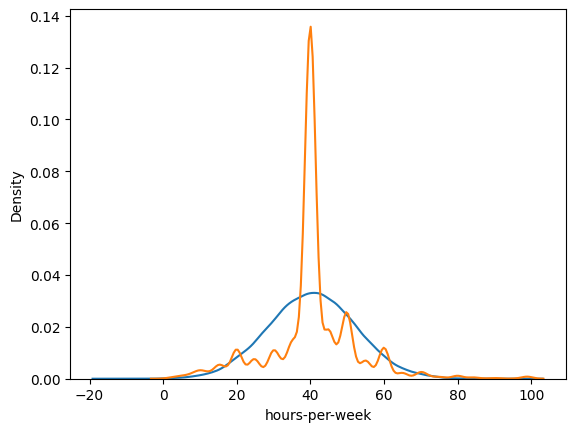

In [147]:
sample_data = np.random.normal(df_mean, df_stddev, datasets[0].shape[0])
sns.kdeplot(sample_data)
sns.kdeplot(datasets[0])

In [179]:
def remove_outliers(df):
    std = np.std(df)
    return df[df.abs() <= 2*std]

no_outlers = remove_outliers(datasets[0])

<Axes: xlabel='hours-per-week', ylabel='Density'>

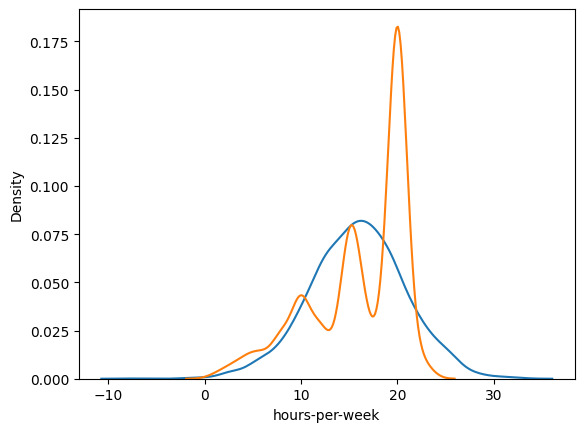

In [182]:
no_outlers_mean, no_outlers_stddev =  np.mean(no_outlers), np.std(no_outlers)
no_outlers_sample = np.random.normal(no_outlers_mean, no_outlers_stddev, no_outlers.shape[0])
sns.kdeplot(no_outlers_sample)
sns.kdeplot(no_outlers)


<Axes: xlabel='hours-per-week', ylabel='Density'>

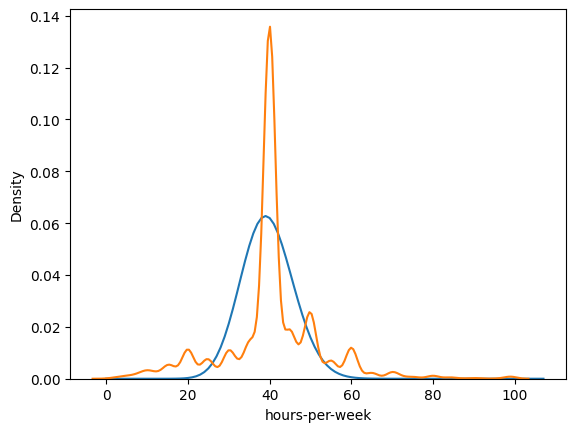

In [198]:
no_outlers_mean =  np.mean(datasets[0])
x = range(int(datasets[0].min()), int(datasets[0].max()) + 10)
no_outlers_sample = poisson.pmf(x, no_outlers_mean)
plt.plot(no_outlers_sample)
sns.kdeplot(datasets[0])


In [190]:
num_bootstrap_samples = 1000

# Bootstrap resampling
bootstrap_samples = [np.random.choice(datasets[0], size=1000, replace=True) for _ in range(num_bootstrap_samples)]

# Example: Calculating mean of each bootstrap sample
bootstrap_means = [np.mean(sample) for sample in bootstrap_samples]

# Example: Calculating 95% confidence interval for the mean
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])

print("Bootstrap Mean:", np.mean(bootstrap_means))
print("Real mean:", np.mean(datasets[0]))
print("95% Confidence Interval for the Mean:", confidence_interval)


Bootstrap Mean: 40.486678
Real mean: 40.49300111982083
95% Confidence Interval for the Mean: [39.769975 41.160175]
